In [ ]:
from google.colab import drive
import os

drive.mount("/content/gdrive")
path="/content/gdrive/My Drive/FaceRecognition"
os.chdir(path)

Mounted at /content/gdrive


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 19 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=56cb403ffa2b856229b7ba564b323339458e47900a4f0cf31e06fda57d2af11a
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
!wget https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/YALE.tar.gz

--2021-12-21 04:49:28--  https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/YALE.tar.gz
Resolving vismod.media.mit.edu (vismod.media.mit.edu)... 18.27.72.36
Connecting to vismod.media.mit.edu (vismod.media.mit.edu)|18.27.72.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30032961 (29M) [application/x-gzip]
Saving to: ‘YALE.tar.gz’

YALE.tar.gz         100%[===================>]  28.64M  27.3MB/s    in 1.0s    

2021-12-21 04:49:29 (27.3 MB/s) - ‘YALE.tar.gz’ saved [30032961/30032961]



In [ ]:
!tar xvfz YALE.tar.gz

YALE/
YALE/matlab/
YALE/matlab/find_support.m
YALE/matlab/pad_faces.m
YALE/matlab/prompt_eyes.m
YALE/matlab/rotate_faces.m
YALE/matlab/shift_faces.m
YALE/matlab/support_faces.m
YALE/matlab/unpad_faces.m
YALE/matlab/face_matrix.m
YALE/matlab/dump_bases.m
YALE/matlab/pca_faces.m
YALE/matlab/README
YALE/matlab/face_setup.m
YALE/matlab/pgmRead.m
YALE/matlab/pgmWrite.m
YALE/centered/
YALE/centered/subject01.happy.pgm
YALE/centered/subject01.leftlight.pgm
YALE/centered/subject01.noglasses.pgm
YALE/centered/subject01.normal.pgm
YALE/centered/subject01.rightlight.pgm
YALE/centered/subject01.sad.pgm
YALE/centered/subject01.sleepy.pgm
YALE/centered/subject01.surprised.pgm
YALE/centered/subject01.wink.pgm
YALE/centered/subject02.centerlight.pgm
YALE/centered/subject02.glasses.pgm
YALE/centered/subject02.happy.pgm
YALE/centered/subject02.leftlight.pgm
YALE/centered/subject02.noglasses.pgm
YALE/centered/subject02.normal.pgm
YALE/centered/subject02.rightlight.pgm
YALE/centered/subject02.sad.pgm
YALE

In [ ]:
from PIL import Image
import glob2
import numpy as np

list_file_image= glob2.glob("YALE/centered/*")
list_file_image_rotated =glob2.glob("YALE/rotated/*")
list_file_image_unpadded = glob2.glob("YALE/unpadded/*")
list_file_image_supported = glob2.glob("YALE/supported/*")
list_file_image_faces = glob2.glob("YALE/faces/*")
list_name=[]
list_state=[]
list_image=[]
for link in list_file_image:
  name=link.split("/")[-1].split(".")[0]
  state=link.split("/")[-1].split(".")[1]
  image=np.array(Image.open(link))
  list_name.append(name)
  list_state.append(state)
  list_image.append(image)

for link in list_file_image_rotated:
  name=link.split("/")[-1].split(".")[0]
  state=link.split("/")[-1].split(".")[1]
  image=np.array(Image.open(link))
  list_name.append(name)
  list_state.append(state)
  list_image.append(image)

for link in list_file_image_supported:
  name=link.split("/")[-1].split(".")[0]
  state=link.split("/")[-1].split(".")[1]
  image=np.array(Image.open(link))
  list_name.append(name)
  list_state.append(state)
  list_image.append(image)

for link in list_file_image_faces:
  name=link.split("/")[-1].split(".")[0]
  state=link.split("/")[-1].split(".")[1]
  image=np.array(Image.open(link))
  list_name.append(name)
  list_state.append(state)
  list_image.append(image)

In [ ]:
print(len(list_image))
print(np.unique(list_name, return_counts= True))
print(list_name)

825
(array(['subject01', 'subject02', 'subject03', 'subject04', 'subject05',
       'subject06', 'subject07', 'subject08', 'subject09', 'subject10',
       'subject11', 'subject12', 'subject13', 'subject14', 'subject15'],
      dtype='<U9'), array([55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]))
['subject01', 'subject01', 'subject01', 'subject01', 'subject01', 'subject01', 'subject01', 'subject01', 'subject01', 'subject02', 'subject02', 'subject02', 'subject02', 'subject02', 'subject02', 'subject02', 'subject02', 'subject02', 'subject02', 'subject02', 'subject03', 'subject03', 'subject03', 'subject03', 'subject03', 'subject03', 'subject03', 'subject03', 'subject03', 'subject03', 'subject03', 'subject04', 'subject04', 'subject04', 'subject04', 'subject04', 'subject04', 'subject04', 'subject04', 'subject04', 'subject04', 'subject04', 'subject05', 'subject05', 'subject05', 'subject05', 'subject05', 'subject05', 'subject05', 'subject05', 'subject05', 'subject05', 'subject05',

In [ ]:

%tensorflow_version 
import tensorflow as tf
print(tf.__version__)


Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x
2.7.0


In [ ]:
import cv2

list_resize_face= []

for face in list_image:
  face_resize= cv2.resize(face,(224, 224))
  list_resize_face.append(face_resize)

X= np.stack(list_resize_face)
X.shape

(825, 224, 224)

In [ ]:
np.where(list_name == 'subject01')

(array([], dtype=int64),)

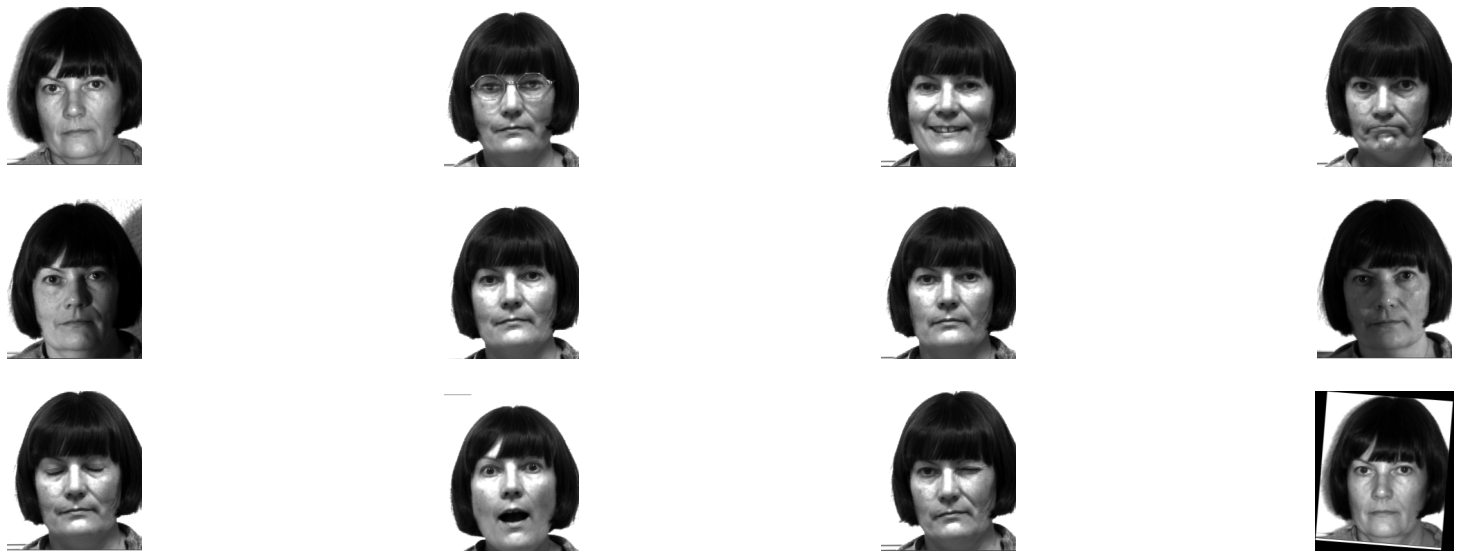

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

def show_image_data(person):
  fg, ax= plt.subplots(3,4,figsize=(30,10) )
  ids=np.flatnonzero(np.array(list_name)==person)
  total = 0
  for i in np.arange(3):
    for j in np.arange(4):
      try:
        image = cv2.cvtColor(list_image[ids[total]], cv2.COLOR_BGR2RGB)
        total+=1
        ax[i, j].imshow(image)
        ax[i, j].axis('off')
      except:
        ax[i, j].axis('off')
        next

show_image_data('subject11')        

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, id_train, id_test = train_test_split(X, list_name, np.array((X)), stratify= list_name, test_size = 1/11)
print(Y_train)

['subject09', 'subject11', 'subject15', 'subject07', 'subject13', 'subject06', 'subject11', 'subject11', 'subject08', 'subject15', 'subject01', 'subject03', 'subject05', 'subject01', 'subject09', 'subject09', 'subject06', 'subject08', 'subject08', 'subject06', 'subject13', 'subject07', 'subject07', 'subject02', 'subject04', 'subject14', 'subject02', 'subject09', 'subject15', 'subject04', 'subject13', 'subject13', 'subject14', 'subject03', 'subject10', 'subject10', 'subject07', 'subject09', 'subject06', 'subject04', 'subject14', 'subject06', 'subject12', 'subject03', 'subject11', 'subject05', 'subject08', 'subject10', 'subject13', 'subject03', 'subject04', 'subject09', 'subject04', 'subject01', 'subject02', 'subject13', 'subject10', 'subject03', 'subject11', 'subject03', 'subject05', 'subject12', 'subject09', 'subject11', 'subject09', 'subject11', 'subject10', 'subject03', 'subject02', 'subject02', 'subject01', 'subject01', 'subject04', 'subject14', 'subject13', 'subject15', 'subject06'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(np.expand_dims(X_train, axis=-1))

In [ ]:
no_batch = 0
X_au = []
y_au = []
for i in np.arange(len(X_train)):
  # print(X_train[i].shape)
  no_img = 0
  X_train_each = np.expand_dims(X_train[i], axis = -1)
  # print(X_train_each.sha
  for x in datagen.flow(np.expand_dims(X_train_each, axis = 0), batch_size = 1):
    X_au.append(x[0])
    y_au.append(Y_train[i])
    no_img += 1
    if no_img == 3:
      break
X_au= np.squeeze(X_au)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape)
# X_au = np.array(X_au)
# y_au = np.array(y_au)
# print(X_au.shape)
# print(np.unique(y_au))
print(np.unique(Y_test, return_counts=True))

(750, 224, 224)
(75, 224, 224)
(750, 224, 224)
(array(['subject01', 'subject02', 'subject03', 'subject04', 'subject05',
       'subject06', 'subject07', 'subject08', 'subject09', 'subject10',
       'subject11', 'subject12', 'subject13', 'subject14', 'subject15'],
      dtype='<U9'), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))


In [ ]:
import pickle

def save_pickle(obj, link):
  with open(link, "wb") as f:
    pickle.dump(obj, f)

def load_pickle(link):
  with open(link, "rb") as f:
    obj= pickle.load(f)
  return obj

save_pickle(X, "YALE/X.pkl")
save_pickle(list_name, "YALE/Y.pkl")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [ ]:
def base_network():
  model = VGG16(include_top = True, weights = None, input_tensor=Input(shape=(224, 224, 1)), input_shape=(224,224,1))
  dense = Dense(128)(model.layers[-4].output)
  norm2 = Lambda(lambda x: tf.math.l2_normalize(x, axis = 1))(dense)
  model = Model(inputs = [model.input], outputs = [norm2])
  return model
def another_base_network():
  model = VGG16(include_top = True, weights = 'imagenet', input_tensor=Input(shape=(224, 224, 3)))
  for layer in model.layers[:-5]:
    layer.trainable = False
  dense = Dense(128)(model.layers[-4].output)
  norm2 = Lambda(lambda x: tf.math.l2_normalize(x, axis = 1))(dense)
  model = Model(inputs = [model.input], outputs = [norm2])
  return model
model = base_network()
another_model = another_base_network()
model.summary()
another_model.summary()



553476096/553467096 [==============================] - 8s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      640       
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
import tensorflow_addons as tfa

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tfa.losses.TripletSemiHardLoss())
another_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tfa.losses.TripletSemiHardLoss())

In [ ]:
# generate_train = tf.data.Dataset.from_tensor_slices((np.expand_dims(X_train, axis=-1), Y_train)).repeat().shuffle(1024).batch(32)
# generate_test = tf.data.Dataset.from_tensor_slices((np.expand_dims(X_test, axis=-1), Y_test)).repeat().shuffle(1024).batch(32)
# another_generate_train = tf.data.Dataset.from_tensor_slices((np.repeat(np.expand_dims(X_train, axis=3),3,axis=3),Y_train)).repeat().shuffle(1024).batch(32)
another_generate_train = tf.data.Dataset.from_tensor_slices((np.repeat(np.expand_dims(X_train, axis=3),3,axis=3),Y_train)).repeat().shuffle(1024).batch(32)
another_generate_test = tf.data.Dataset.from_tensor_slices((np.repeat(np.expand_dims(X_test, axis=3),3,axis=3),Y_test)).repeat().shuffle(1024).batch(32)
# np.repeat(np.expand_dims(face_rz, axis=3), 3, axis=3)

In [ ]:
training_face = model.fit(generate_train,steps_per_epoch = 20,epochs=10)

In [ ]:
tf.config.run_functions_eagerly(True)
training_face = another_model.fit(another_generate_train,steps_per_epoch = 50,epochs=10)

Epoch 1/10
50/50 [==============================] - 80s 1s/step - loss: 0.5727
Epoch 2/10
50/50 [==============================] - 58s 1s/step - loss: 0.1250
Epoch 3/10
50/50 [==============================] - 58s 1s/step - loss: 0.0212
Epoch 4/10
50/50 [==============================] - 58s 1s/step - loss: 0.0039
Epoch 5/10
50/50 [==============================] - 59s 1s/step - loss: 6.5524e-04
Epoch 6/10
50/50 [==============================] - 57s 1s/step - loss: 1.4531e-04
Epoch 7/10
50/50 [==============================] - 57s 1s/step - loss: 3.4469e-05
Epoch 8/10
50/50 [==============================] - 57s 1s/step - loss: 7.2315e-05
Epoch 9/10
50/50 [==============================] - 57s 1s/step - loss: 2.6310e-05
Epoch 10/10
50/50 [==============================] - 57s 1s/step - loss: 5.6415e-06


In [ ]:
another_model.save('another_face_reco_YALE.h5')

In [ ]:
model.save('face_reco_YALE.h5')

In [ ]:
another_model.load_weights('another_face_reco_YALE.h5')

In [ ]:
model.load_weights('face_reco_YALE.h5')

In [ ]:
from numpy import save
X_train_test = another_model.predict(np.repeat(np.expand_dims(X_train, axis=3),3,axis=3))
X_test_test = another_model.predict(np.repeat(np.expand_dims(X_test, axis=3),3,axis=3))
# print(np.expand_dims(X_test, axis = -1))
save('embedding.npy', X_train_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def most_similarity(embed_vecs, vec, labels):
  sim = cosine_similarity(embed_vecs, vec)
  #print(sim)
  sim = np.squeeze(sim, axis = 1)
  argmax = np.argsort(sim)[::-1][:1]
  label = [labels[idx] for idx in argmax][0]
  return label

vec = X_test_test[10].reshape(1, -1)
most_similarity(X_train_test, vec, Y_train)


'subject08'

In [ ]:
from sklearn.metrics import accuracy_score
y_predict_list = []
for vec in X_test_test:
  vec = vec.reshape(1, -1)
  y_predict = most_similarity(X_train_test, vec, Y_train)
  y_predict_list.append(y_predict)

print(accuracy_score(y_predict_list, Y_test))

1.0


In [ ]:
from sklearn.metrics import accuracy_score
y_predict_list = []
for vec in X_train_test:
  vec = vec.reshape(1, -1)
  y_predict = most_similarity(X_train_test, vec, Y_train)
  y_predict_list.append(y_predict)

print(accuracy_score(y_predict_list, Y_train))

1.0


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


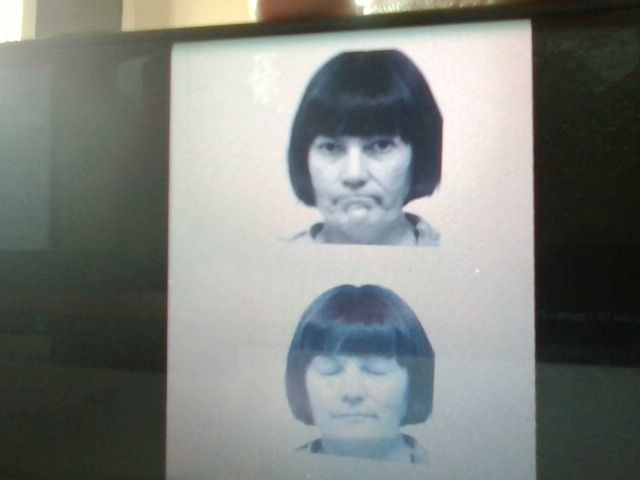

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import face_recognition
from google.colab.patches import cv2_imshow

def convert_to_binary(img_grayscale, thresh=100):
    thresh, img_binary = cv2.threshold(img_grayscale, thresh, maxval=255, type=cv2.THRESH_BINARY)
    return img_binary

def _image_read(image_path):
  image = cv2.imread(image_path)
  # img_binary = convert_to_binary(image, thresh=100)
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  print(image_gray.shape)
  #gray_image_3band = np.repeat(image_gray, repeats = 3, axis = -1)
  return image_gray

def _extract_bbox(image, single = True):
  bboxs = face_recognition.face_locations(image)
  if len(bboxs)==0:
    return None
  if single:
    bbox = bboxs[0]
    #bbox = cv2.cvtColor(bbox, cv2.COLOR_RGB2GRAY)
    return bbox
  else:
    return bboxs

def _extract_face(image, bbox, face_scale_thres = (300, 300)):
  h, w = image.shape[:2]
  try:
    (startY, startX, endY, endX) = bbox
  except:
    return None
  minX, maxX = min(startX, endX), max(startX, endX)
  minY, maxY = min(startY, endY), max(startY, endY)
  face = image[minY:maxY, minX:maxX].copy()
  # extract the face ROI and grab the ROI dimensions
  (fH, fW) = face.shape[:2]

  # ensure the face width and height are sufficiently large
  if fW < face_scale_thres[0] or fH < face_scale_thres[1]:
    return None
  else:
    cv2_imshow(face)
    return face

def _normalize_image(image, epsilon=0.000001):
  means = np.mean(image.reshape(-1, 1), axis=0)
  stds = np.std(image.reshape(-1, 1), axis=0)
  image_norm = image - means
  image_norm = image_norm/(stds + epsilon)
  return image_norm

(231, 195)
(231, 195)


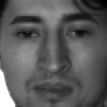

(1, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[[ 0.00846765 -0.00633309  0.13668737 -0.03281809 -0.13667504 -0.0102625
  -0.10596254  0.11157637 -0.07928774 -0.1969366  -0.1445426   0.00158522
   0.06803311 -0.09813257 -0.01337172 -0.01255411  0.15929079  0.09492204
   0.05445548  0.0893805   0.0436488   0.08041643 -0.00717144 -0.03456806
  -0.1995112  -0.0291177  -0.06367676  0.1310546   0.01000823  0.10636319
   0.06047319 -0.10792461 -0.09744944  0.08452266 -0.08821735 -0.05230498
   0.06133547 -0.04011134 -0.00084062 -0.0800769   0.08823846  0.08890743
  -0.00539782 -0.00891134  0.07298086  0.04202194  0.0144407  -0.06867173
   0.0083978  -0.08334372 -0.06770579  0.17047827  0.0959111  -0.12350234
   0.04668369 -0.02253436 -0.08372342 -0.02382087  0.0739108   0.12085914
  -0.04553745 -0.07896461 -0.03927572  0.01446791 -0.0913289   0.07266723
  -0.03844956 -0.0591098  -0.01059129 -0.01334694 -0.07239602 -0.11555745
   0.20582075  0.09481266 -0.05577948 -0.11666298 -0.14967003  0.13201073
   0.00310247 -0.04170908  0.0147396  -

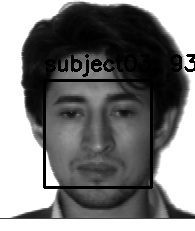

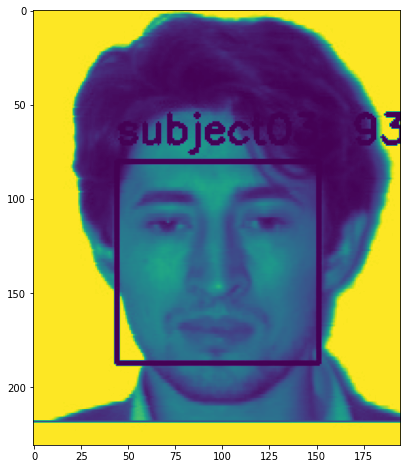

In [ ]:
IMAGE_OUTPUT = "/content/gdrive/My Drive/FaceRecognition/predictions.jpg"
# IMAGE_PREDICT = "/content/gdrive/My Drive/FaceRecognition/photo.jpg"
IMAGE_PREDICT= "/content/gdrive/My Drive/FaceRecognition/YALE/centered/subject03.centerlight.pgm"

image = _image_read(IMAGE_PREDICT)
image = _image_read(IMAGE_PREDICT)
bboxs = _extract_bbox(image, single=False)
faces = []
for bbox in bboxs:
  face = _extract_face(image, bbox, face_scale_thres = (50, 50))
  # face = face.copy()
  faces.append(face)
  #try: lúc đầu try ở đây
  face_rz = cv2.resize(face, X_train[0].shape)
  # print("rz:",face_rz.shape)
  # Chuẩn hóa ảnh bằng hàm _normalize_image
  face_tf = face_rz
  face_tf = np.expand_dims(face_tf, axis = 0)
  # add 3 dim to feed to anther model 
  another_face_3d =  np.repeat(np.expand_dims(face_rz, axis=2), 3, axis=2)
  another_face_3d = np.expand_dims(another_face_3d, axis = 0)
  print(another_face_3d.shape)
  # Embedding face
  vec = model.predict(face_tf)
  another_vec = another_model.predict(another_face_3d)
  print(another_vec)
  # Tìm kiếm ảnh gần nhất
  name = most_similarity(X_train_test, vec, Y_train)
  another_name = most_similarity(X_train_test,another_vec, Y_train)
  # Tìm kiếm các bbox
  (startY, startX, endY, endX) = bbox
  minX, maxX = min(startX, endX), max(startX, endX)
  minY, maxY = min(startY, endY), max(startY, endY)
  pred_proba=np.random.uniform(0.9, 1.0)
  text = "{}: {:.2f}%".format(name, pred_proba * 100)
  another_text = "{}: {:.2f}%".format(another_name, pred_proba * 100)
  print(another_text)
  y = startY - 10 if startY - 10 > 10 else startY + 10
  # cv2.rectangle(image, (minX, minY), (maxX, maxY), (0, 0, 255), 2)
  # cv2.putText(image, text, (minX, y),
  #   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
  
  cv2.rectangle(image, (minX, minY), (maxX, maxY), (0, 0, 255), 2)
  cv2.putText(image, another_text, (minX, y),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
  # except:
  #     print("Not found face")
cv2.imwrite(IMAGE_OUTPUT, image)

cv2.imwrite(IMAGE_OUTPUT, image)
# import matplotlib.pyplot as plt

plt.figure(figsize = (16, 8))
img = plt.imread(IMAGE_OUTPUT,0)
plt.imshow(img)
cv2_imshow(img)